# Домашнее задание "Теория оптимизации".

# Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [31]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [32]:
# Ackley function
def ackley_function(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [33]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley_function, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [34]:
result_1 = differential_evolution(ackley_function, bounds, strategy='best1bin', 
                                popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.2, 
                                seed=42, updating='immediate')
result_1.x, result_1.fun

(array([0., 0.]), 4.440892098500626e-16)

In [35]:
result_2 = differential_evolution(ackley_function, bounds, strategy='rand1exp', 
                                popsize=20, tol=0.3, mutation=(0.5, 1), recombination=0.7, 
                                seed=42, updating='deferred')
result_2.x, result_2.fun

(array([ 5.09656527e-10, -2.85438184e-11]), 1.4437842033032666e-09)

In [91]:
# Если tol > 0.2, то количество итераций становится = 1. С чем это связано?
result_2.nit

1

In [22]:
result_3 = differential_evolution(ackley_function, bounds, strategy='currenttobest1exp', 
                                popsize=100, tol=0.01, mutation=(0.0001, 1.9), recombination=0.7, 
                                seed=42, updating='immediate')
result_3.x, result_3.fun

(array([0., 0.]), 4.440892098500626e-16)

In [96]:
result_3.nit

1000

In [23]:
result_4 = differential_evolution(ackley_function, bounds, strategy='rand2bin', 
                                popsize=15, tol=0.01, mutation=(0.0001, 1.9), recombination=0.1, 
                                seed=42, updating='immediate')
result_4.x, result_4.fun

(array([0., 0.]), 4.440892098500626e-16)

In [6]:
result_4.nit

229

In [24]:
result_5 = differential_evolution(ackley_function, bounds, strategy='best2exp', 
                                popsize=115, tol=0.1, mutation=(0.1, 1), recombination=0.8, 
                                seed=42, updating='deferred')
result_5.x, result_5.fun

(array([0., 0.]), 4.440892098500626e-16)

In [11]:
result_5.nit

123

In [63]:
res  =  [] 
param  =  [] 
for  i  in range(1, 100, 10):     
    res.append(differential_evolution(ackley_function,  bounds,  popsize=i,  seed=42 )['nit']) 
    param.append(i)

In [64]:
res

[7, 89, 91, 97, 97, 97, 93, 102, 92, 97]

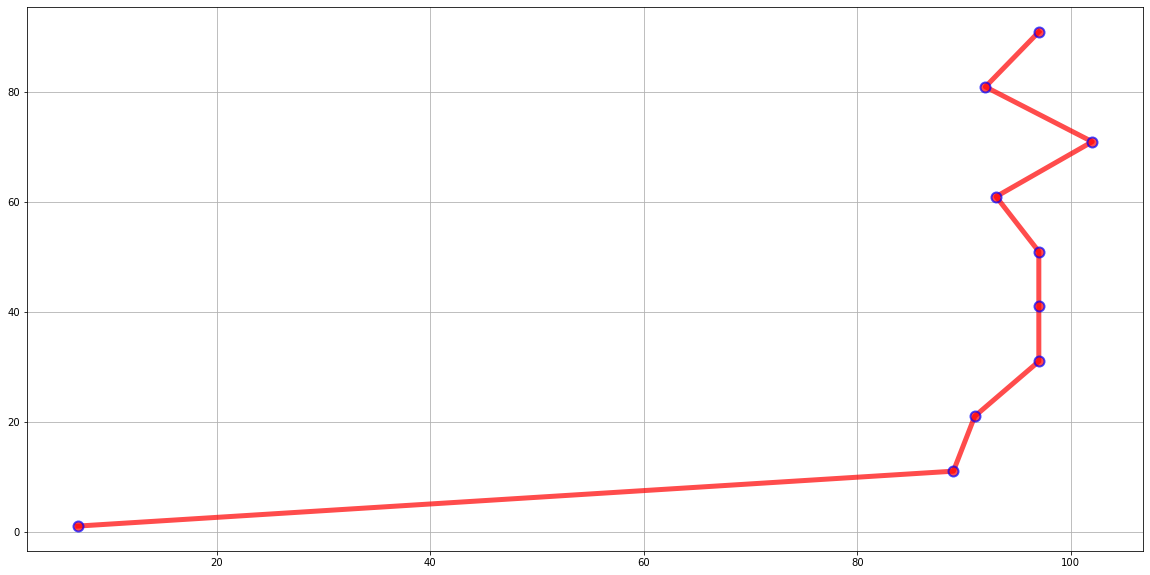

In [65]:
x = res
y = param
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

In [66]:
res  =  [] 
param  =  [] 
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp',
             'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin',
             'rand2bin', 'rand1bin']

for  i  in strategies:     
    res.append(differential_evolution(ackley_function,  bounds,  strategy=i,  seed=42 )['nit']) 
    param.append(i)

In [67]:
res

[90, 147, 246, 156, 1000, 244, 341, 101, 1000, 166, 232, 168]

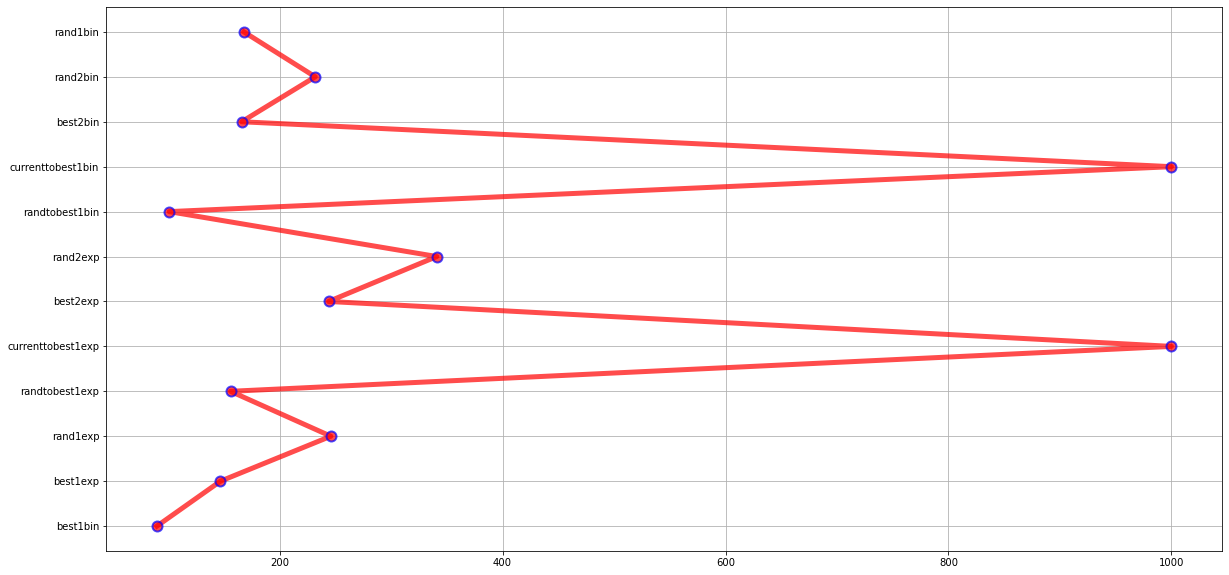

In [68]:
x = res
y = param
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

In [69]:
res  =  [] 
param  =  []
tols = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for  i  in tols:     
    res.append(differential_evolution(ackley_function,  bounds,  tol=i,  seed=42 )['nit']) 
    param.append(i)

In [70]:
res

[90, 90, 90, 1, 1, 1, 1, 1, 1, 1]

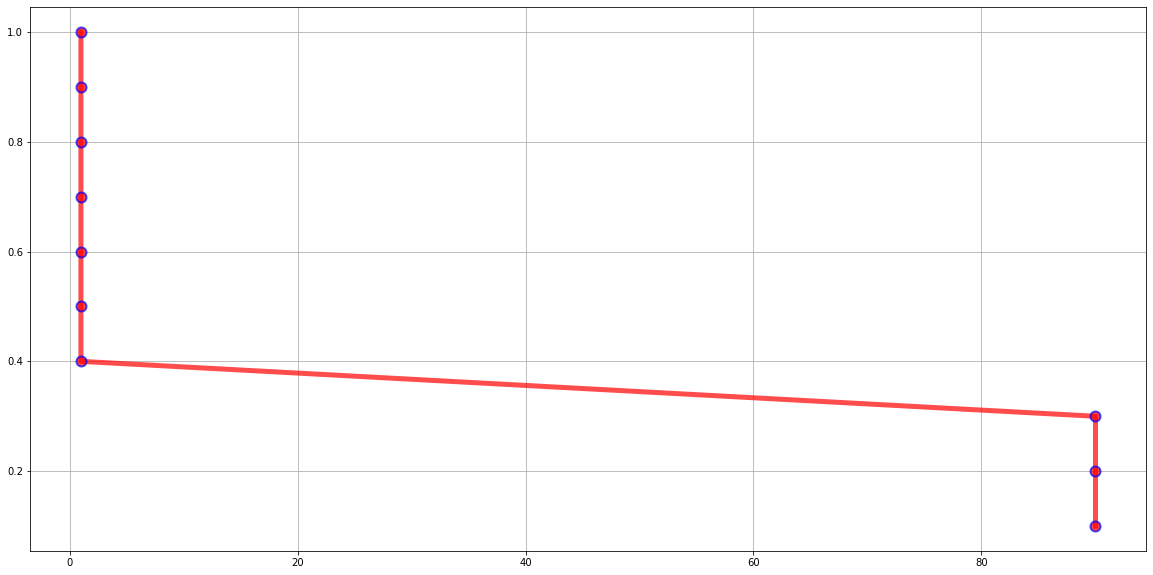

In [71]:
x = res
y = param
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

In [72]:
res  =  [] 
param  =  []
mutations = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
for  i  in mutations:     
    res.append(differential_evolution(ackley_function,  bounds,  mutation=i,  seed=42 )['nit']) 
    param.append(i)

In [73]:
res

[5,
 28,
 38,
 47,
 57,
 76,
 91,
 104,
 137,
 138,
 187,
 199,
 216,
 269,
 318,
 176,
 244,
 245,
 246]

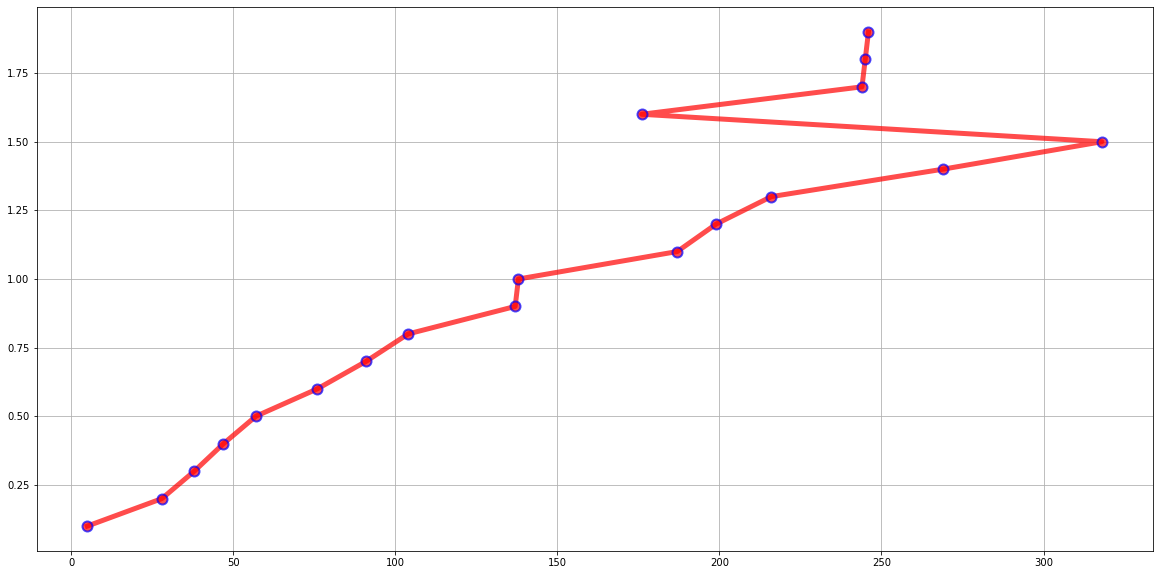

In [74]:
x = res
y = param
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

In [60]:
res  =  [] 
param  =  [] 
rand = list(np.random.rand(1, 10))[0]
for  i  in rand:     
    res.append(differential_evolution(ackley_function,  bounds,  recombination=i,  seed=42 )['nit']) 
    param.append(i)

In [61]:
res

[116, 104, 81, 112, 94, 86, 116, 116, 122, 109]

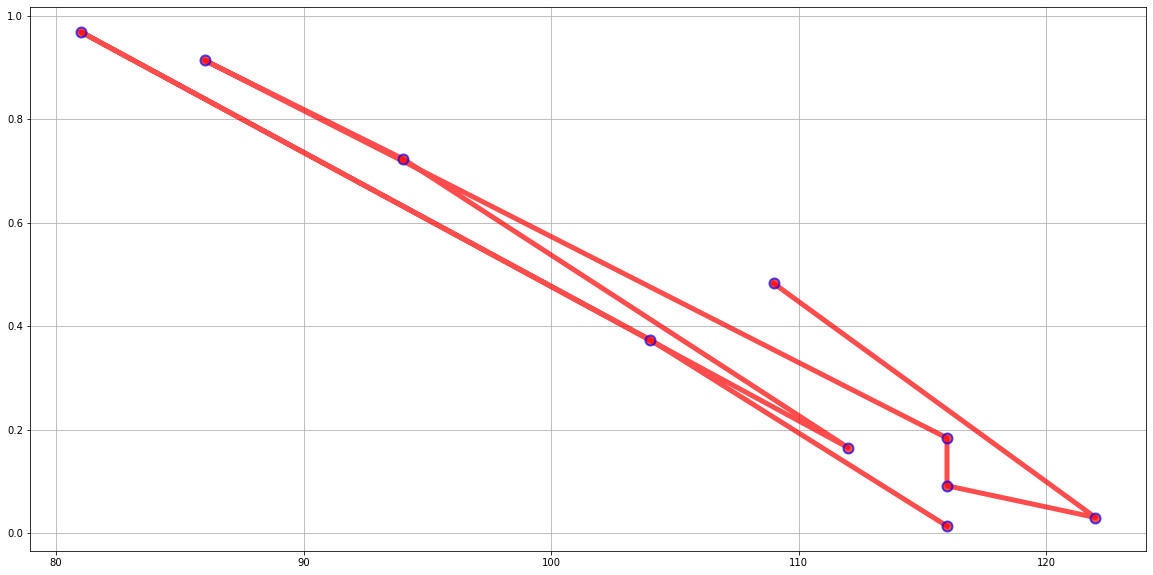

In [62]:
x = res
y = param
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

In [57]:
res  =  [] 
param  =  [] 
updatings = ['immediate', 'deferred']
for  i  in updatings:     
    res.append(differential_evolution(ackley_function,  bounds,  updating=i,  seed=42 )['nit']) 
    param.append(i)

In [58]:
res

[90, 122]

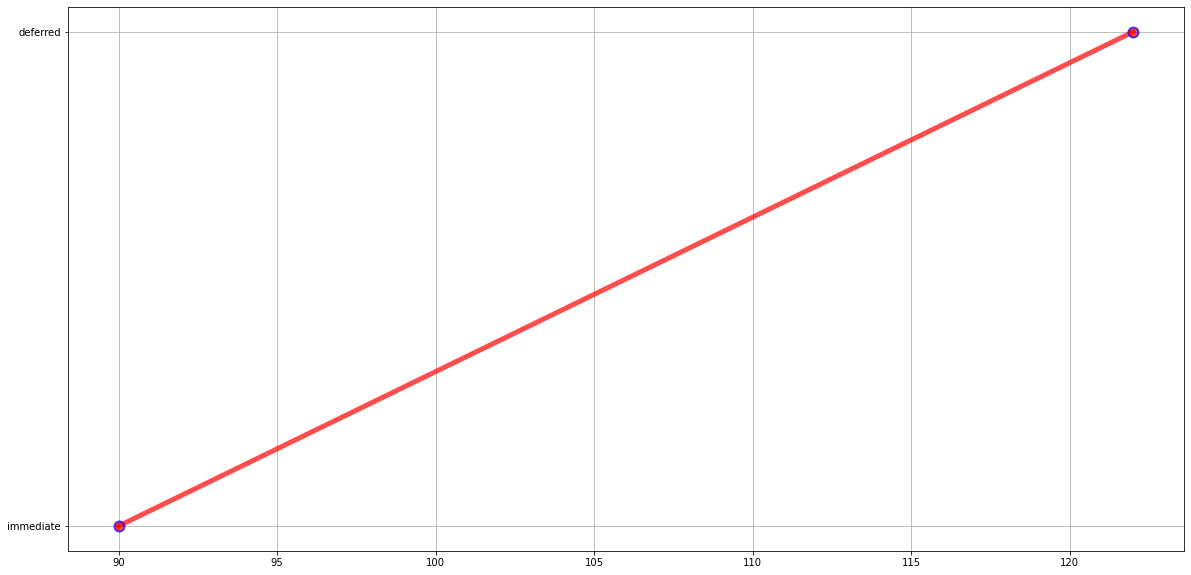

In [59]:
x = res
y = param
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

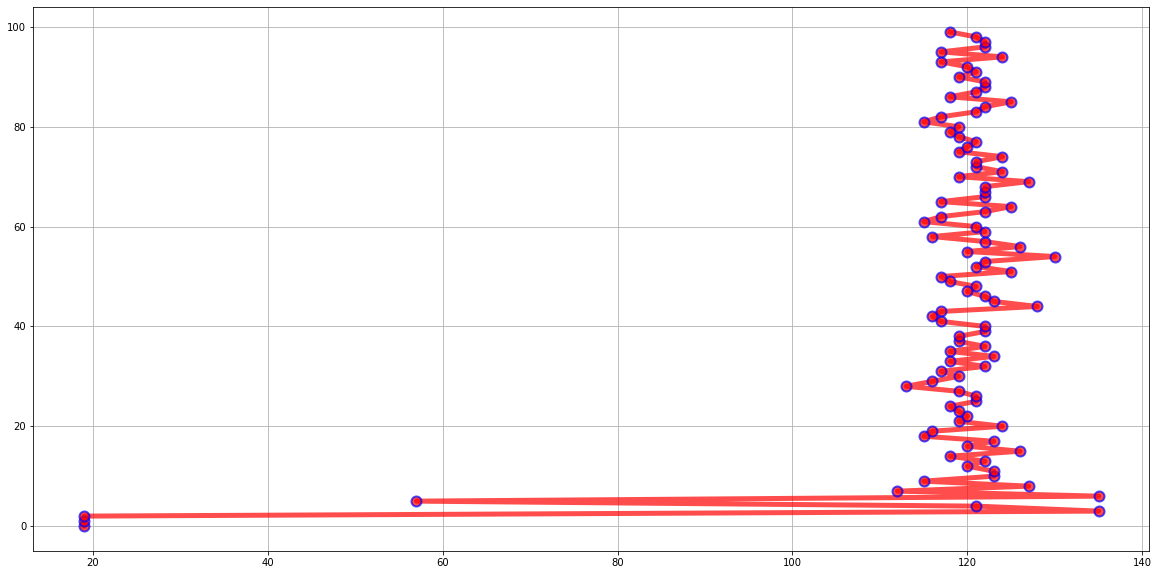

In [30]:
x = nit_list
y = popsize_list
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

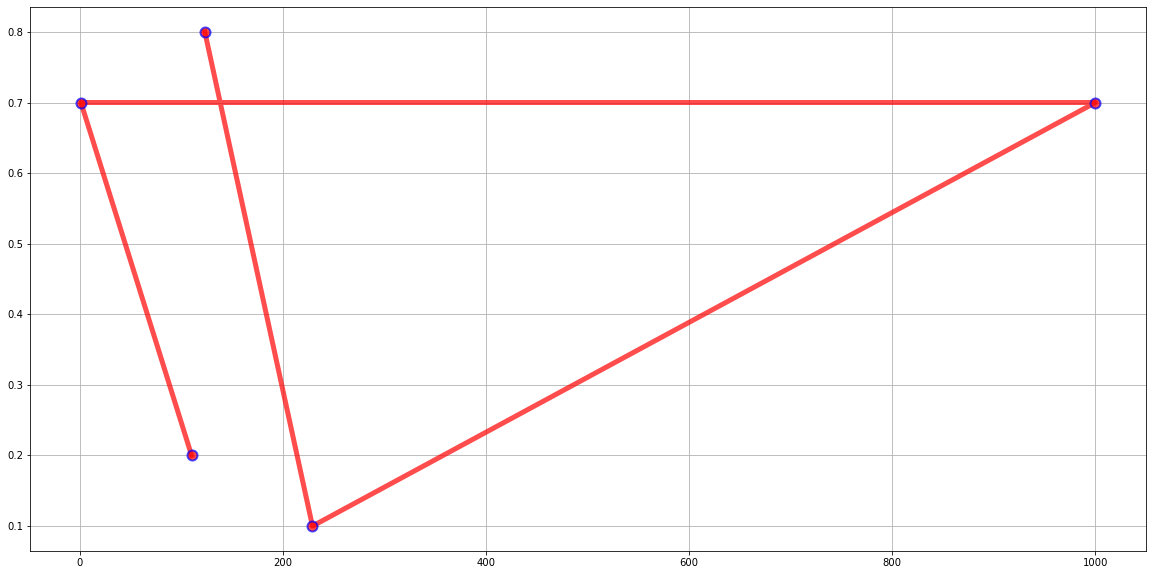

In [28]:
x = [result_1.nit, result_2.nit, result_3.nit, result_4.nit, result_5.nit]
y = [0.2, 0.7, 0.7, 0.1, 0.8]
plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.grid(True)

# Дополнительное задание.
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [69]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [124]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp',
             'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin',
             'rand2bin', 'rand1bin']

In [149]:
nit = 10000
for i in strategies:
    result_1 = differential_evolution(ackley, bounds, strategy=i, seed=42, updating='immediate')
    result_2 = differential_evolution(ackley, bounds, strategy=i, seed=42, updating='deferred')
    if result_1.nit < result_2.nit:
        if nit > result.nit:
            nit = result_1.nit
            params = {'strategy': i, 'updating': 'immediate'}
    elif result_1.nit > result_2.nit:
        if nit > result.nit:
            nit = result_2.nit
            params = {'strategy': i, 'updating': 'deferred'}
print(f'Параметры с минимальным количеством итераций: {params}, количество итераций: {nit}')

Параметры с минимальным количеством итераций: {'strategy': 'best1bin', 'updating': 'immediate'}, количество итераций: 90
